In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# defining features
x1 = [2.5, 0.5, 2.2, 1.9, 3.1, 2.3, 2, 1, 1.5, 1.1]
x2 = [2.4, 0.7, 2.9, 2.2, 3, 2.7, 1.6, 1.1, 1.6, 0.9]
len(x1), len(x2)

(10, 10)

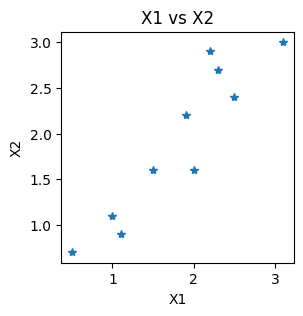

In [12]:
# plotting
plt.figure(figsize=(3,3))
plt.title("X1 vs X2")
plt.plot(x1, x2, '*')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [10]:
# Standardization

def standardize(data):
    return (data - np.mean(data)) / np.std(data)

x1_standardized = standardize(x1)
x2_standardized = standardize(x2)

x1_standardized, x2_standardized

(array([ 0.92627881, -1.7585873 ,  0.52354889,  0.12081898,  1.73173864,
         0.6577922 ,  0.25506228, -1.08737078, -0.41615425, -0.95312747]),
 array([ 0.61016865, -1.506743  ,  1.23278973,  0.36112022,  1.35731394,
         0.9837413 , -0.38602507, -1.00864614, -0.38602507, -1.25769457]))

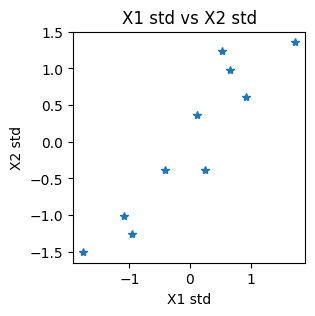

In [13]:
plt.figure(figsize=(3,3))
plt.title("X1 std vs X2 std")
plt.plot(x1_standardized, x2_standardized, '*')
plt.xlabel('X1 std')
plt.ylabel('X2 std')
plt.show()

In [14]:
# Covariance matrix of data matrix
# Shape will be (m, m) i.e. square
# m: number of features

# This (m, m) matrix will have m PCs

covariance_matrix = np.cov(x1_standardized, x2_standardized)
covariance_matrix

array([[1.11111111, 1.0288103 ],
       [1.0288103 , 1.11111111]])

In [16]:
# Eigendecomposition of covariance matrix
# column ``eigenvectors[:,i]`` is the eigenvector 
# corresponding to the eigenvalue ``eigenvalues[i]``.

# eigenvalues are not necessarily ordered

eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
eigenvalues, eigenvectors

(array([2.13992141, 0.08230081]),
 array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]))

In [20]:
# np.linalg.eig??

In [24]:
sort_idx = np.argsort(eigenvalues) # ascending order
desc_idx = sort_idx[::-1]
desc_idx, sort_idx

(array([0, 1]), array([1, 0]))

In [41]:
# sorted eigenvalues
eigenvalues_sorted = eigenvalues[desc_idx]
eigenvals_expl_variance = eigenvalues_sorted / np.sum(eigenvalues_sorted)
eigenvalues_sorted, eigenvals_expl_variance

(array([2.13992141, 0.08230081]), array([0.96296464, 0.03703536]))

In [30]:
# maintain the columns as eigenvectors
eigenvectors_sorted = eigenvectors.T[desc_idx].T
eigenvectors_sorted

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [36]:
# new data
new_data = np.array(([2, 1]))
new_data

array([2, 1])

In [37]:
# assuming only one PCA dimension is taken
new_data_in_pca = new_data * eigenvectors_sorted[:,0]
new_data_in_pca

array([1.41421356, 0.70710678])